In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from plotting_utils import plot_X

# auto reload modules when they change
%load_ext autoreload
%autoreload 2

In [2]:
# Some variables to define notebook bahavior
data_path = 'data/'
save_plots = False
save_plot_path = 'figures/'

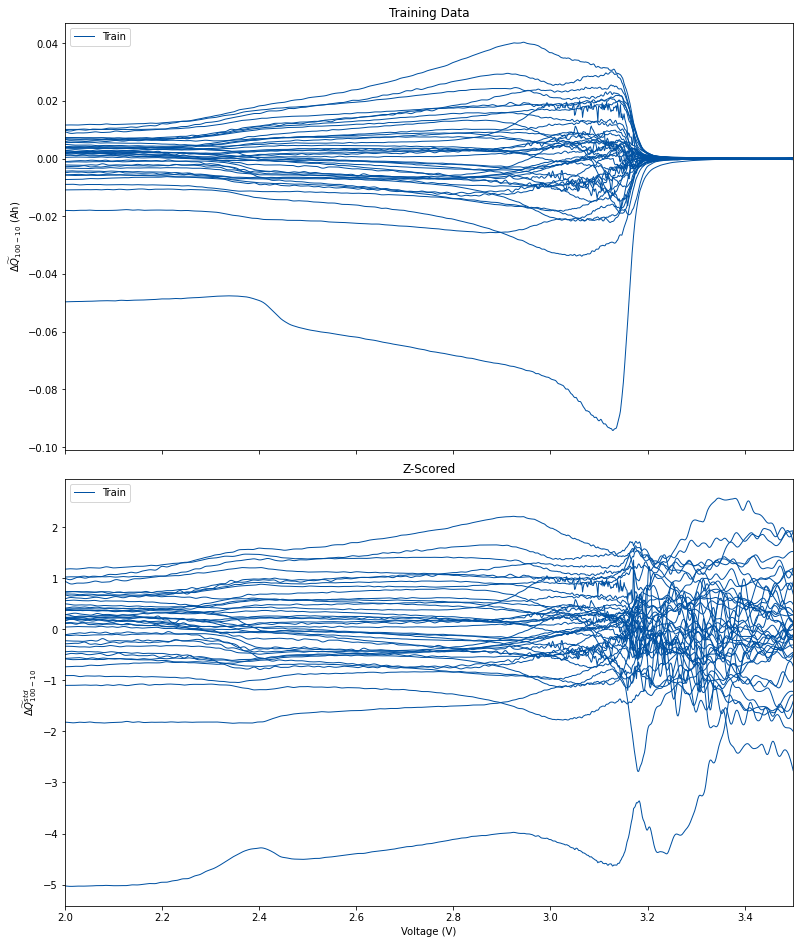

In [33]:
# Read csv to dataframe
df = pd.read_csv('data/r/rv_local.csv')

# Load the LFP Dataset
lfp_df = pd.read_csv(data_path + 'lfp_slim.csv', index_col=0)

X_lfp = np.array(lfp_df.iloc[:, 0:1000])    
X_lfp = X_lfp[:, ::-1]
y_lfp_true = np.array(lfp_df.iloc[:, 1000])
x_lfp = np.linspace(2.0, 3.5, 1000)

X_lfp_train = np.array(X_lfp[lfp_df.iloc[:, 1002]==0, :])
y_lfp_train_true = np.array(y_lfp_true[lfp_df.iloc[:, 1002]==0])
# X_lfp_test = np.array(X_lfp[lfp_df.iloc[:, 1002]==1, :])
# y_lfp_test_true = np.array(y_lfp_true[lfp_df.iloc[:, 1002]==1])
# X_lfp_test2 = np.array(X_lfp[lfp_df.iloc[:, 1002]==2, :])
# y_lfp_test2_true = np.array(y_lfp_true[lfp_df.iloc[:, 1002]==2])

fig, ax = plot_X(X_lfp_train, x_lfp)
if save_plots: 
    fig.savefig(save_plot_path + 'TrainingData.pdf') 

In [34]:
df

,sd.error,r2,waic,waic.dof,log.l,mu.coef,se.coef,CI.coef.1,CI.coef.2,t.stat,n.stars,ESS,rank
y,0.000036,1.0,-357.440174,47.309764,382.152502,4.907572,0.499916,4.248766,5.953548,9.816787,2,4.0,1.0
X.1,0.000036,1.0,-357.440174,47.309764,382.152502,2.405957,65.297129,-126.365756,133.682066,0.036846,0,9636.0,575.0
X.2,0.000036,1.0,-357.440174,47.309764,382.152502,3.222377,68.576048,-132.367424,139.983951,0.046990,0,10000.0,334.0
X.3,0.000036,1.0,-357.440174,47.309764,382.152502,2.489166,71.135205,-139.392802,139.926699,0.034992,0,9972.0,264.0
X.4,0.000036,1.0,-357.440174,47.309764,382.152502,1.893620,74.184841,-144.795932,152.518222,0.025526,0,9940.0,334.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
X.997,0.000036,1.0,-357.440174,47.309764,382.152502,0.027247,0.891808,-1.710845,1.826511,0.030552,0,9131.0,700.0
X.998,0.000036,1.0,-357.440174,47.309764,382.152502,0.051609,0.892087,-1.684975,1.825506,0.057852,0,10000.0,54.0
X.999,0.000036,1.0,-357.440174,47.309764,382.152502,0.055268,0.890891,-1.727532,1.800273,0.062037,0,9960.0,424.0
X.1000,0.000036,1.0,-357.440174,47.309764,382.152502,0.083374,0.885187,-1.649155,1.867608,0.094188,0,9964.0,334.0


In [35]:
df["mu.coef"]

y         4.907572
X.1       2.405957
X.2       3.222377
X.3       2.489166
X.4       1.893620
            ...   
X.997     0.027247
X.998     0.051609
X.999     0.055268
X.1000    0.083374
_cons     0.159706
Name: mu.coef, Length: 1002, dtype: float64

In [36]:
df["mu.coef"] + 1.9604*df["se.coef"]

y           5.887608
X.1       130.414450
X.2       137.658862
X.3       141.942622
X.4       147.325581
             ...    
X.997       1.775547
X.998       1.800456
X.999       1.801770
X.1000      1.818694
_cons       0.339296
Length: 1002, dtype: float64

In [37]:
0.001356 + 2*0.005982

0.01332

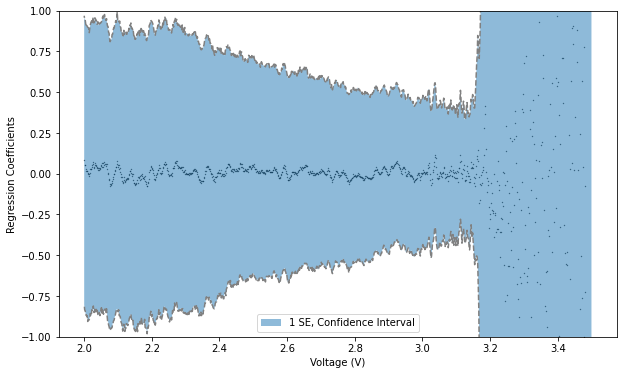

In [40]:
# Make a plot of the data in the first figure and the regeression coefficents in the 
# figure below including the 95% credible intervals.

fig, ax = plt.subplots(figsize=(10, 6))
x_lfp = np.linspace(3.5, 2.0, 1000)

beta_mu = df["mu.coef"].iloc[1:1001]
beta_lower_cf95 = df["CI.coef.1"].iloc[1:1001]
beta_upper_cf95 = df["CI.coef.2"].iloc[1:1001]

beta_lower_1se = beta_mu - df["se.coef"].iloc[1:1001]
beta_upper_1se = beta_mu + df["se.coef"].iloc[1:1001]


ax.scatter(x_lfp, beta_mu, color='black', s=10e-2)
ax.plot(x_lfp, beta_lower_1se, color='grey', linestyle='--')
ax.plot(x_lfp, beta_upper_1se, color='grey', linestyle='--')
ax.fill_between(x_lfp, beta_lower_1se, beta_upper_1se, alpha=0.5, label='1 SE, Confidence Interval')

ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Regression Coefficients')
ax.set_ylim(-1, 1)
ax.legend()
# visaulize y=0
# ax.axhline(y=0, color='black', linestyle='--')


In [ ]:
# Next, lets work with the Z-scored data!
# call the R script from python!
# %load_ext rpy2.ipython
# %R source('src/fit_bayesian_penalized_regression.R')

# %R -o df df <- read.csv('data/r/rv_zscore.csv')
# %R -o df df <- df[,-1]

# Next investigate different noise priors. 

In [ ]:
# Revisit the manuscript and change the wording to reflect the new results.
# Think about the hypothesis test and whether that should be done or not.
